# Import statements

In [144]:
from skimage import io
import numpy as np
import os
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix

## Functions for running model, then getting statistics, as well as confusion matrix

In [145]:
def testPredict(X_train, X_test, y_train, y_test,model):
    model.fit(X_train,y_train)
    ypred = model.predict(X_test)
    plot_confusion_matrix(model, X_test, y_test, cmap='RdPu')
    print(metrics.classification_report(y_test, ypred))
    
def modelLearning(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.2)
    model = LogisticRegression()
    print('Logistic model')
    testPredict(X_train, X_test, y_train, y_test,model)
    model = DecisionTreeClassifier()
    print('Decision Tree model')
    testPredict(X_train, X_test, y_train, y_test,model)
    model = RandomForestClassifier()
    print('Random Forest model')
    testPredict(X_train, X_test, y_train, y_test,model)

# Collects files from my folder, classifies them

In [146]:
folder = '/Users/hazel/Downloads/Image/Jake Keels - Jake_Keels'

images = [os.path.join(root, filename)
          for root, dirs, files in os.walk(folder)
          for filename in files
          if filename.lower().endswith('.jpg')]
y_img = []
ic = []
#230400
for img in images:
    if np.size(io.imread(img).flatten()) == 230400:
        ic.append(io.imread(img).flatten())
        if 'ban' in img.lower():
            y_img.append(0)
        elif 'or' in img.lower():
            y_img.append(1)
        else:
            y_img.append(2)
X_train, X_test, y_train, y_test = train_test_split(ic, y_img,test_size=.2)

# Running models

Logistic model


C:\Users\hazel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hazel\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.44      0.57      0.50         7
           1       0.62      0.45      0.53        11
           2       0.54      0.58      0.56        12

    accuracy                           0.53        30
   macro avg       0.54      0.54      0.53        30
weighted avg       0.55      0.53      0.53        30

Decision Tree model


C:\Users\hazel\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.71      0.71      0.71         7
           1       0.77      0.91      0.83        11
           2       0.80      0.67      0.73        12

    accuracy                           0.77        30
   macro avg       0.76      0.76      0.76        30
weighted avg       0.77      0.77      0.76        30

Random Forest model


C:\Users\hazel\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.70      1.00      0.82         7
           1       0.88      0.64      0.74        11
           2       0.75      0.75      0.75        12

    accuracy                           0.77        30
   macro avg       0.78      0.80      0.77        30
weighted avg       0.78      0.77      0.76        30



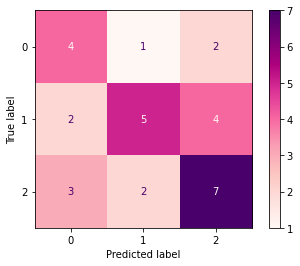

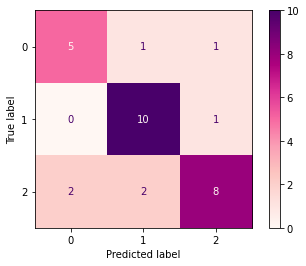

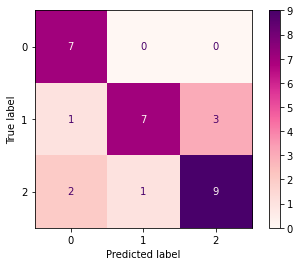

In [147]:
modelLearning(ic,y_img)